#### In this notebook, I still used K-Nearest Neighbours to predict the survival, the difference is I combined Sibsp & Parch column into Family_Size, and added Title which is derived from Name, however the accuracy is only 61%, which is lower than previous notebook 65%....

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [3]:
# Read input data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# A glance of the data - Train
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# A glance of the data - test
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Concat train set and test test to do data cleaning
df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# Check null data
df_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
# Fill value for null data (except cabin)
df_all['Embarked'].fillna(df_all['Embarked'].mode()[0], inplace = True)
df_all['Fare'].fillna(df_all['Fare'].median(), inplace = True)
df_all['Age'].fillna(df_all['Age'].median(), inplace = True)
df_all['Survived'].fillna(9, inplace = True)

In [9]:
# convert object values to category using LabelEncoder()
label = LabelEncoder()
df_all['Sex_Code'] = label.fit_transform(df_all['Sex'])
df_all['Ticket_Code'] = label.fit_transform(df_all['Ticket'])
df_all['Embarked_Code'] = label.fit_transform(df_all['Embarked'])

In [11]:
# Add "Family Size" column = Siblings/Spouse + Parents/Children + Self
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

In [17]:
# Use Name column to determine title
df_all['Title'] = df_all['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
# Look for Title appears less than 10 times 
stat_min = 10
title_names = (df_all['Title'].value_counts() < stat_min)
df_all['Title'] = df_all['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [18]:
df_all['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64

In [23]:
df_all['Title_Code'] = label.fit_transform(df_all['Title'])

In [24]:
df_all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Code,Ticket_Code,Embarked_Code,Family_Size,Title,Title_Code
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,720,2,2,Mr,3
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,816,0,2,Mrs,4
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,914,2,1,Miss,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,65,2,2,Mrs,4
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,649,2,1,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,9.0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1,711,2,1,Mr,3
1305,1306,9.0,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,834,0,1,Misc,1
1306,1307,9.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,872,2,1,Mr,3
1307,1308,9.0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1,579,2,1,Mr,3


In [31]:
# now the data is clean, lets separate it to Train, Cross-Val and Test
df_train = df_all.loc[df_all['Survived'].isin([0,1])]
df_test = df_all.loc[df_all['Survived'].isin([9])]

# Features (columns) will be used
X_columns = ['Pclass', 'Sex_Code', 'Age', 'Family_Size', 'Fare', 'Ticket_Code', 'Embarked_Code', 'Title_Code']

# Convert to Array
X = df_train[X_columns].values
Y = df_train['Survived'].values

In [61]:
# Scale the data
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X.astype(float))
X 

array([[ 0.82737724,  0.73769513, -0.56573646, ...,  0.93143334,
         0.58595414,  0.2893919 ],
       [-1.56610693, -1.35557354,  0.66386103, ...,  1.27816704,
        -1.9423032 ,  1.40561778],
       [ 0.82737724, -1.35557354, -0.25833709, ...,  1.63212435,
         0.58595414, -0.82683399],
       ...,
       [ 0.82737724, -1.35557354, -0.1046374 , ...,  1.66463064,
         0.58595414, -0.82683399],
       [-1.56610693,  0.73769513, -0.25833709, ..., -1.62933949,
        -1.9423032 ,  0.2893919 ],
       [ 0.82737724,  0.73769513,  0.20276197, ...,  0.64971221,
        -0.67817453,  0.2893919 ]])

In [62]:
# Split into Train and Cross Validation
X_train, X_cross, Y_train, Y_cross = train_test_split( X, Y, test_size=0.2, random_state=3)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Cross val set:', X_cross.shape,  Y_cross.shape)

Train set: (712, 8) (712,)
Cross val set: (179, 8) (179,)


In [73]:
# Use KNN

# Determine the K first

Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_cross)
    mean_acc[n-1] = metrics.accuracy_score(Y_cross, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_cross)/np.sqrt(yhat.shape[0])

mean_acc

array([0.70949721, 0.73743017, 0.76536313, 0.77653631, 0.79329609,
       0.80446927, 0.77653631, 0.77653631, 0.77653631, 0.7877095 ,
       0.78212291, 0.7877095 , 0.77653631, 0.77094972, 0.76536313,
       0.76536313, 0.78212291, 0.7877095 , 0.7877095 , 0.77653631,
       0.79888268, 0.7877095 , 0.79329609, 0.79888268, 0.79329609,
       0.79329609, 0.79329609, 0.79888268, 0.81005587, 0.79329609,
       0.7877095 , 0.79329609, 0.79329609, 0.79888268, 0.80446927,
       0.80446927, 0.80446927, 0.79888268, 0.80446927, 0.79329609,
       0.80446927, 0.80446927, 0.80446927, 0.79329609, 0.79888268,
       0.79329609, 0.79888268, 0.79329609, 0.79888268, 0.80446927,
       0.80446927, 0.80446927, 0.80446927, 0.80446927, 0.80446927,
       0.80446927, 0.80446927, 0.80446927, 0.80446927, 0.80446927,
       0.80446927, 0.79329609, 0.79888268, 0.78212291, 0.78212291,
       0.78212291, 0.7877095 , 0.78212291, 0.7877095 , 0.78212291,
       0.7877095 , 0.77653631, 0.77653631, 0.77653631, 0.77653

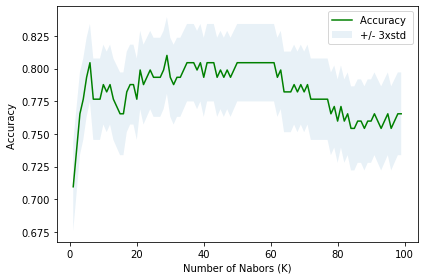

In [74]:
# visualize the K
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [75]:
# looks like 29 is the better option for KNN (81%)
neigh = KNeighborsClassifier(n_neighbors = 29).fit(X, Y)

In [76]:
# lets predict test set
X_test = df_test[X_columns].values
X_test = scaler.transform(X_test)
yhat=neigh.predict(X_test)
yhat.astype(int)

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [112]:
df_result = pd.DataFrame({'PassengerId':  df_test['PassengerId'], 'Survived': yhat.astype(int)})
df_result

,PassengerId,Survived
891,892,0
892,893,0
893,894,1
894,895,0
895,896,0
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [113]:
df_result.to_csv('my_submission_03.csv', index=False)